IA = A<br>
Meaning, an identity matrix times a matrix equals the matrix.<br>
So multiplying a negative Lambda value by an identity matrix gives you a matrix that you combine with the A matrix to solve for Lambda.<br>
Finding the value for Lambda that solves this this system without zeros is how one finds eigenvalues.<br>
Solve this by setting the determinant of the system given equal to zero and solving.<br>

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
G = nx.Graph()
G.add_edge(1,3)
G.add_edge(2,3)

In [8]:
x = nx.eigenvector_centrality(G)
print(sorted(x.keys()))
print(sorted(x.values()))

[1, 2, 3]
[0.5000000644180599, 0.5000000644180599, 0.707106690085642]


In [9]:
1/2**0.5

0.7071067811865475

In [10]:
from readlist import readlist

ModuleNotFoundError: No module named 'readlist'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


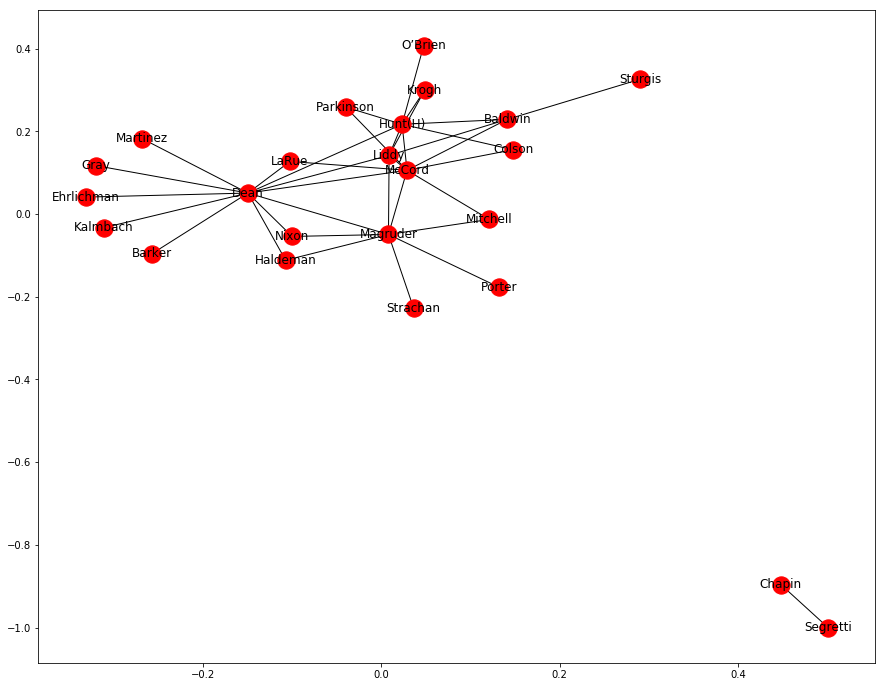

In [11]:
WT = nx.read_edgelist('watergate-testimony-links.dat')
#watergate_action = nx.read_edgelist('watergate-actions-links.dat')
plt.figure(figsize = (15,12))
nx.draw_networkx(WT)

In [12]:
xw = nx.eigenvector_centrality(WT)
xw

{'Baldwin': 0.22352862710220164,
 'Hunt(H)': 0.3644867374750945,
 'Liddy': 0.3593721625583793,
 'McCord': 0.4328921627214787,
 'Sturgis': 0.041691513502942576,
 'Dean': 0.4379499449508072,
 'Barker': 0.08168520084822053,
 'Ehrlichman': 0.08168520084822053,
 'Gray': 0.08168520084822053,
 'Haldeman': 0.1437751577690472,
 'Kalmbach': 0.08168520084822053,
 'LaRue': 0.1624265970089038,
 'Martinez': 0.08168520084822053,
 'Nixon': 0.1437751577690472,
 'Colson': 0.14872385203036861,
 'O’Brien': 0.06798245586968535,
 'Parkinson': 0.14872385203036861,
 'Krogh': 0.1350111767905266,
 'Magruder': 0.33289095169669825,
 'Mitchell': 0.14283135308151085,
 'Porter': 0.062089956920827576,
 'Strachan': 0.062089956920827576,
 'Segretti': 2.3583662458175013e-10,
 'Chapin': 2.3583662458175013e-10}

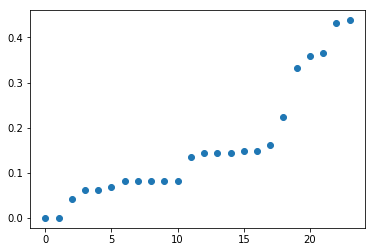

In [13]:
plt.plot(sorted(xw.values()),'o')

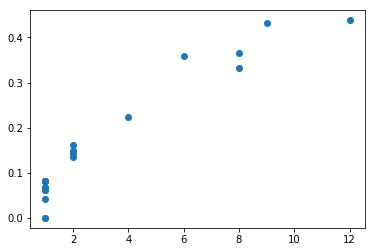

In [14]:
scatter = []
for i in WT.nodes():
    k = WT.degree(i)
    scatter.append((k,xw[i]))

plt.plot([k for (k,e) in scatter],[e for (k,e) in scatter],'o')

In [15]:
L=nx.Graph()
n=100
for i in range(n-1):
    L.add_edge(i,i+1)
L.order()

100

In [16]:
L.size()

99

In [17]:
xl=nx.eigenvector_centrality(L)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [18]:
import scipy.linalg as lin

In [19]:
Al = nx.adjacency_matrix(L).toarray()

In [20]:
R=lin.eig(Al)

In [21]:
len(R) #should be 2
R[0]
R[1]

array([[ 0.00437636,  0.00874848,  0.01311214, ...,  0.12849426,
        -0.13934326,  0.13934326],
       [-0.00874848, -0.01746312, -0.02611019, ...,  0.10477001,
         0.03888104,  0.03888104],
       [ 0.01311214,  0.02611019,  0.03888104, ..., -0.04306823,
         0.12849426, -0.12849426],
       ...,
       [-0.01311214,  0.02611019, -0.03888104, ..., -0.04306823,
         0.12849426,  0.12849426],
       [ 0.00874848, -0.01746312,  0.02611019, ...,  0.10477001,
         0.03888104, -0.03888104],
       [-0.00437636,  0.00874848, -0.01311214, ...,  0.12849426,
        -0.13934326, -0.13934326]])

In [26]:
maxlamb=0.
for c in range(len(R[0])):
    lamb=R[0][c]
    if lamb>maxlamb:
        maxlamb=lamb
        cmax=c

In [27]:
cmax

35

In [28]:
maxlamb

(1.9990325645839773+0j)

In [29]:
R[1][:,cmax]

array([0.00437636, 0.00874848, 0.01311214, 0.01746312, 0.0217972 ,
       0.02611019, 0.03039792, 0.03465625, 0.03888104, 0.04306823,
       0.04721374, 0.05131358, 0.05536378, 0.05936042, 0.06329963,
       0.0671776 , 0.07099058, 0.07473488, 0.07840688, 0.08200303,
       0.08551985, 0.08895393, 0.09230195, 0.09556068, 0.09872696,
       0.10179772, 0.10477001, 0.10764093, 0.11040772, 0.1130677 ,
       0.11561829, 0.11805703, 0.12038155, 0.12258962, 0.12467908,
       0.12664793, 0.12849426, 0.13021627, 0.13181231, 0.13328083,
       0.1346204 , 0.13582975, 0.13690768, 0.13785317, 0.13866529,
       0.13934326, 0.13988643, 0.14029426, 0.14056637, 0.14070249,
       0.14070249, 0.14056637, 0.14029426, 0.13988643, 0.13934326,
       0.13866529, 0.13785317, 0.13690768, 0.13582975, 0.1346204 ,
       0.13328083, 0.13181231, 0.13021627, 0.12849426, 0.12664793,
       0.12467908, 0.12258962, 0.12038155, 0.11805703, 0.11561829,
       0.1130677 , 0.11040772, 0.10764093, 0.10477001, 0.10179

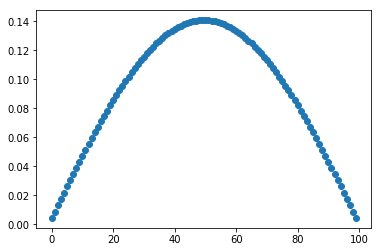

In [31]:
plt.plot(R[1][:,cmax],'o')

In [33]:
import csv
def graph_from_data(data_file,skip_row):
    data = []
    G = nx.Graph()
    with open(data_file, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
             data.append(row)
    for itera in range(skip_row,len(data)):
        i = int(data[itera][0])
        j = int(data[itera][1])
        G.add_edge(i,j)
    return(G)

C = graph_from_data('ca-CondMat-noself.txt',4)

In [34]:
C_C =nx.eigenvector_centrality(C)

In [35]:
C_C

{81626: 0.003859438510015166,
 11894: 0.00019490028024979897,
 16246: 0.004337499270565658,
 16322: 0.00047336745510806,
 18914: 0.0008711226074552188,
 19729: 0.005802790357287857,
 29574: 0.0009221792680587248,
 33045: 0.0005938561904074076,
 47998: 0.00026574602932484184,
 49453: 0.0012111105331957647,
 52148: 0.0002105013447083073,
 53171: 0.00021535754102910463,
 57478: 0.002223189365224656,
 58947: 0.0050409613588788295,
 65889: 0.017840261039877507,
 69807: 0.00028680227705802063,
 71241: 0.00047291940527258755,
 71586: 0.009966611261119022,
 73498: 0.0015014487134830106,
 74989: 0.0003893409621053033,
 77976: 0.0032549224238436897,
 82175: 0.0014055582648237073,
 82686: 0.00363965685531744,
 83197: 0.011350553917098712,
 86550: 0.003714186260404577,
 87044: 0.0012666824557149158,
 90037: 0.005135124095764826,
 91476: 0.0023617482754956557,
 93858: 0.006413816171985038,
 96866: 0.0174859089711802,
 100206: 0.003521324659473096,
 104817: 0.001339378600644659,
 104841: 0.003459586

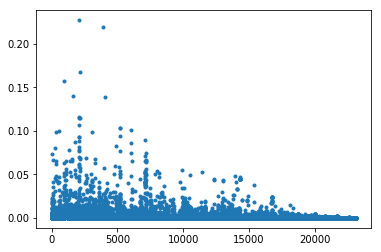

In [39]:
plt.plot(C_C.values(),'.')

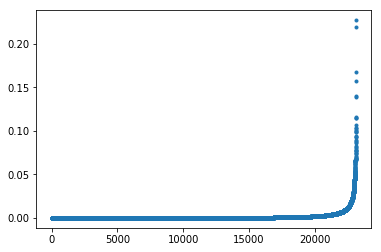

In [40]:
plt.plot(sorted(C_C.values()),'.')

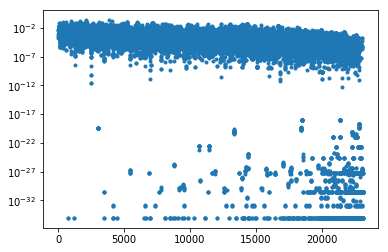

In [41]:
plt.yscale('log')
plt.plot(C_C.values(),'.')

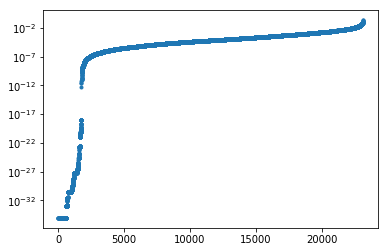

In [42]:
plt.yscale('log')
plt.plot(sorted(C_C.values()),'.')

In [44]:
scatter_c = []
for i in C.nodes():
    k=C.degree(i)
    scatter_c.append((k,C_C[i]))

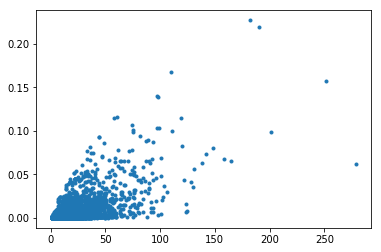

In [46]:
plt.plot([k for (k,e) in scatter_c],[e for (k,e) in scatter_c],'.')

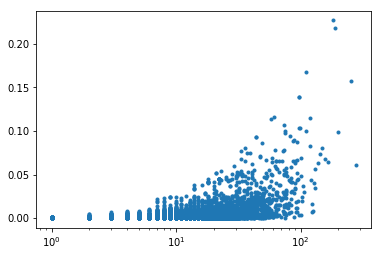

In [49]:
#plt.yscale('log')
plt.xscale('log')
plt.plot([k for (k,e) in scatter_c],[e for (k,e) in scatter_c],'.')

In [50]:
from betweenness import * # He has a program called this

ModuleNotFoundError: No module named 'betweenness'

In [51]:
pwd

'/Users/jmcleod/OneDrive/Other Files/CSI/CSS_692'

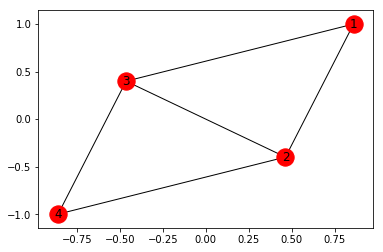

In [52]:
H = nx.Graph()
H.add_edge(1,2)
H.add_edge(1,3)
H.add_edge(2,3)
H.add_edge(2,4)
H.add_edge(3,4)
nx.draw_networkx(H)

In [55]:
B=nx.betweenness_centrality(H)
B
#Shows that ends can't have betweenness. They can have BARE betweenness though

{1: 0.0, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.0}

In [64]:
L = nx.Graph()
n=100
for i in range(n-1):
    L.add_edge(i,i+1)

In [57]:
btL = nx.betweenness_centrality(L)

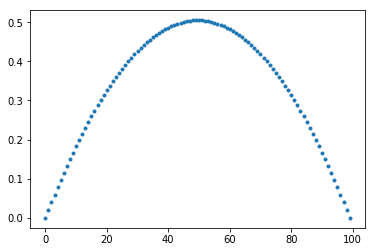

In [59]:
plt.plot(btL.values(),'.')

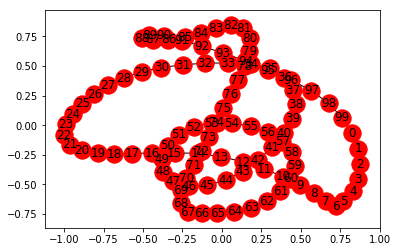

In [61]:
L.add_edge(0,99)
nx.draw_networkx(L)

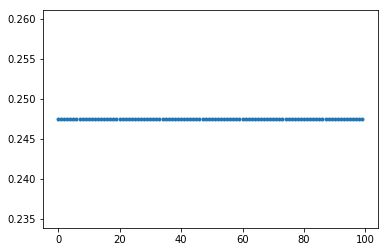

In [62]:
btL = nx.betweenness_centrality(L)
plt.plot(btL.values(),'.')

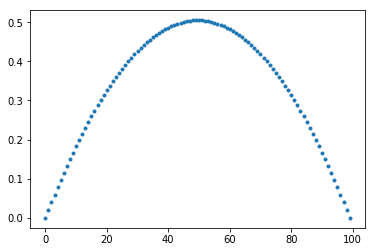

In [65]:
btL = nx.load_centrality(L)
plt.plot(btL.values(),'.')